<a href="https://colab.research.google.com/github/nash567/app_data/blob/master/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle

Saving kaggle.json to kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# changing permission
!chmod 600 ~/.kaggle/kaggle.json

In [0]:

!kaggle datasets download -d ramamet4/app-store-apple-data-set-10k-apps

  0% 0.00/5.63M [00:00<?, ?B/s]
100% 5.63M/5.63M [00:00<00:00, 92.0MB/s]


In [0]:
ls

app-store-apple-data-set-10k-apps.zip  kaggle.json  sample_data/


In [0]:
!unzip app-store-apple-data-set-10k-apps.zip

Archive:  app-store-apple-data-set-10k-apps.zip
  inflating: appleStore_description.csv  
  inflating: AppleStore.csv          


In [0]:
ls


AppleStore.csv              app-store-apple-data-set-10k-apps.zip  sample_data/
appleStore_description.csv  kaggle.json


In [0]:
import pandas as pd
df=pd.read_csv("AppleStore.csv")

In [0]:
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [0]:
df.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [0]:
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [0]:
df=df.rename(columns={"Unnamed: 0":"unnamed","rating_count_tot":"total_people_rate","rating_count_ver":"people_rate_ver","sup_devices.num":"sup_devices","lang.num":"lang_supp","prime_genre":"app_type","ipadSc_urls.num":"screenshot"})

In [0]:
df["size"]=df.size_bytes/1024**2

In [0]:
df.head()

,unnamed,id,track_name,size_bytes,currency,price,total_people_rate,people_rate_ver,user_rating,user_rating_ver,ver,cont_rating,app_type,sup_devices,screenshot,lang_supp,vpp_lic,size
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,96.119141
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,151.232422
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,95.867188
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,122.558594
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,88.476562


## Selecting Important **Columns**

In [0]:
data=df[["size","price","user_rating","total_people_rate","people_rate_ver","cont_rating","user_rating_ver","app_type","sup_devices","lang_supp","screenshot"]]

In [0]:
data.loc[data.price==0,"prices"]=0
data.loc[data.price>0,"prices"]=1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
data.head()

,size,price,user_rating,total_people_rate,people_rate_ver,cont_rating,user_rating_ver,app_type,sup_devices,lang_supp,screenshot,prices
0,96.119141,3.99,4.0,21292,26,4+,4.5,Games,38,10,5,1.0
1,151.232422,0.00,4.0,161065,26,4+,3.5,Productivity,37,23,5,0.0
2,95.867188,0.00,3.5,188583,2822,4+,4.5,Weather,37,3,5,0.0
3,122.558594,0.00,4.0,262241,649,12+,4.5,Shopping,37,9,5,0.0
4,88.476562,0.00,4.5,985920,5320,4+,5.0,Reference,37,45,5,0.0


# How many types of apps we have

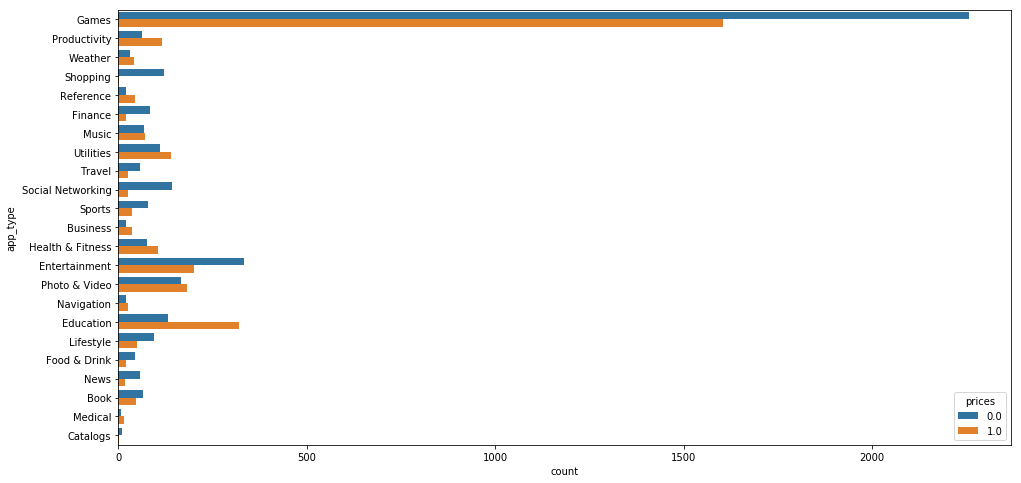

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(y="app_type",data=data,hue="prices")


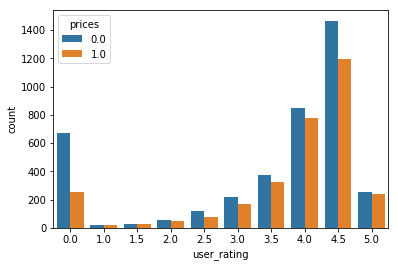

In [0]:
import seaborn as sns

sns.countplot("user_rating",data=data,hue="prices")

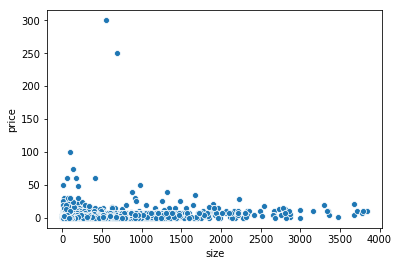

In [0]:
sns.scatterplot(x="size",y="price",data=data)

# Remove Outliers

In [0]:
data.drop(data[data["price"]>50].index,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


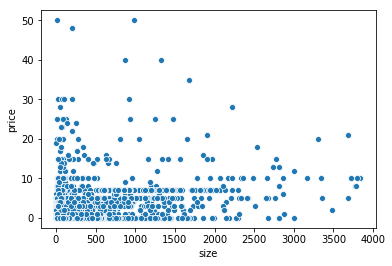

In [0]:
sns.scatterplot(x="size",y="price",data=data)

In [0]:
data.app_type.value_counts()

Games                3862
Entertainment         535
Education             449
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          177
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               56
Navigation             45
Medical                23
Catalogs               10
Name: app_type, dtype: int64

### HOw much rating gaming apps got let's see

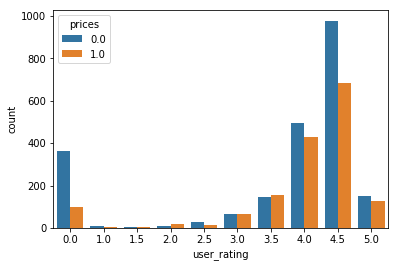

In [0]:
p=data[data.app_type=="Games"]
sns.countplot("user_rating",data=p,hue="prices")

#  Entertainment  Got

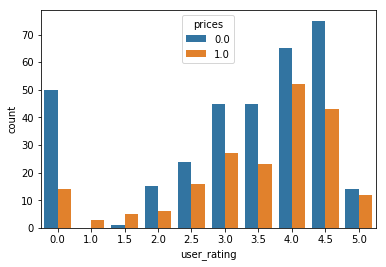

In [0]:
p=data[data.app_type=="Entertainment"]
sns.countplot("user_rating",data=p,hue="prices")

# Education Got

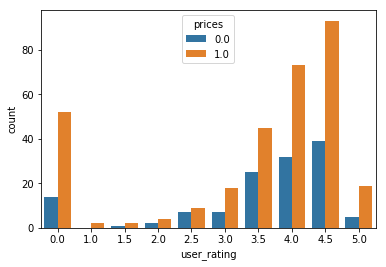

In [0]:
p=data[data.app_type=="Education"]
sns.countplot("user_rating",data=p,hue="prices")

# health and  fitness got

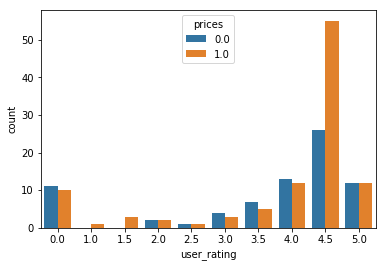

In [0]:
p=data[data.app_type=="Health & Fitness"]
sns.countplot("user_rating",data=p,hue="prices")

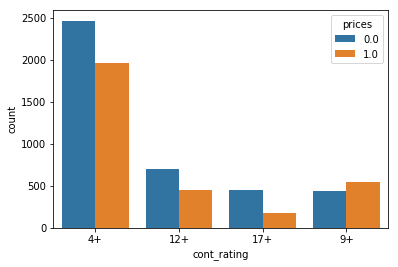

In [0]:
sns.countplot(x="cont_rating",data=data,hue="prices")

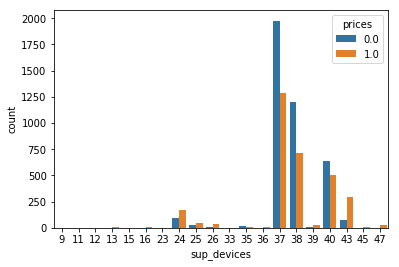

In [0]:
sns.countplot(x="sup_devices",data=data,hue="prices")

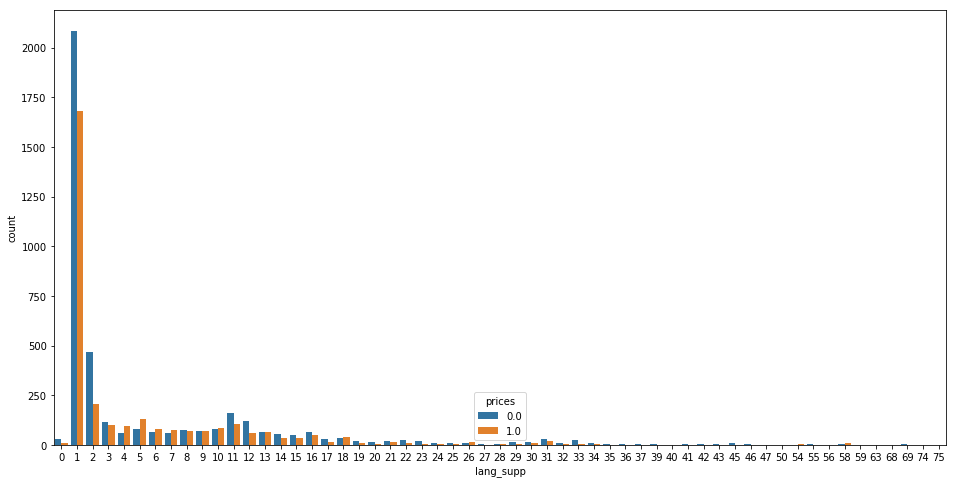

In [0]:
plt.figure(figsize=(16,8))
sns.countplot(x="lang_supp",data=data,hue="prices")

(array([4056.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3134.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

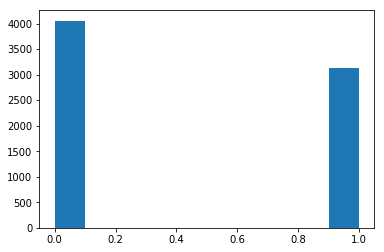

In [0]:
plt.hist("prices",data=data)

In [0]:
d=data.app_type.value_counts().index[:4]
d

Index(['Games', 'Entertainment', 'Education', 'Photo & Video'], dtype='object')

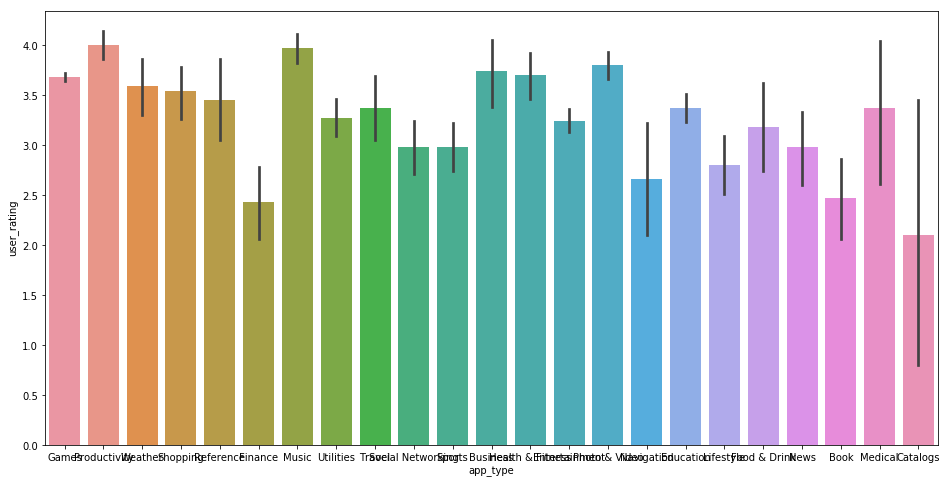

In [0]:
plt.figure(figsize=(16,8))
sns.barplot(y="user_rating",x="app_type",data=data)

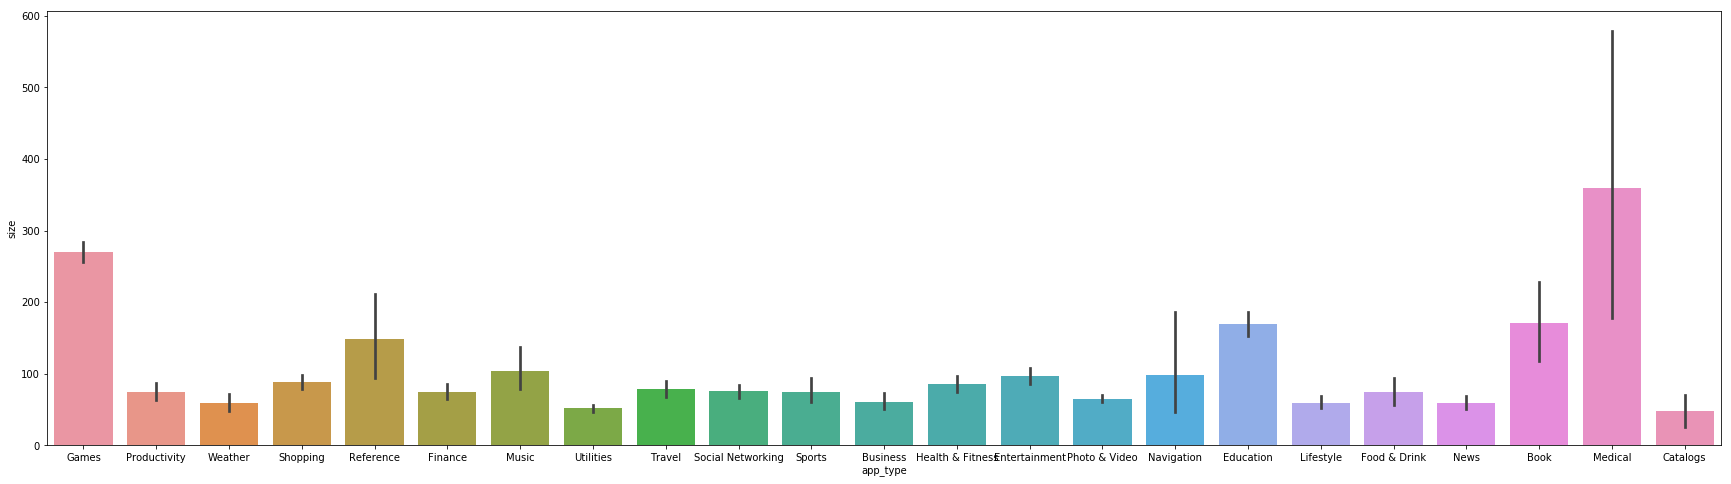

In [0]:
plt.figure(figsize=(30,8))
sns.barplot(x="app_type",y="size",data=data)